In [ ]:
from sklearn.datasets import load_svmlight_file
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as nm
import collections
import csv
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving word.map to word.map
Saving articles.test to articles.test
Saving articles.train to articles.train


#Loading Train and Test data

In [ ]:
# Load training data
X_train_data, y_train_data = load_svmlight_file("articles.train")

# Load test data
X_test_data, y_test_data= load_svmlight_file("articles.test")

# Load word mapping
words = pd.read_csv("words.map.txt", header=None, names=["Word"])

# Checking the number of features (columns/words) and number of articles (rows) in each dataset
no_features = X_train_data.shape[1]
no_train_articles = X_train_data.shape[0]
no_test_articles = X_test_data.shape[0]

print("Number of features:", no_features)
print("Number of articles in training data:", no_train_articles)
print("Number of articles in test data:", no_test_articles)
print("Number of unique words:", len(words))




FileNotFoundError: ignored

#Resizing train and test data

In [ ]:
X_train_data.resize((X_train_data.shape[0], words.shape[0]))
X_test_data.resize((X_test_data.shape[0], words.shape[0]))

# confirming the no. of columns in all three datasets after resizing
print(words.shape)
print(X_train_data.shape)
print(X_test_data.shape)


(61188, 1)
(4000, 61188)
(2400, 61188)


In [ ]:
from sklearn.svm import SVC
import numpy as np

def new_label_y(arr, true_class):
        new_arr = np.where(arr == true_class, 1, -1)
        return new_arr

def train_SVM(x_data, y_data, true_class, C=None, kernel='linear'):
  y_new = new_label_y(y_data, true_class)
  if C is None:
        model = SVC(kernel=kernel, C=1e10)
  else:
        model = SVC(kernel=kernel, C=C)
  model.fit(x_data, y_new)
  return model


#Class 1 vs all other hard margin classifiers

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Train SVM classifier
SVM1 = train_SVM(X_train_data, y_train_data, true_class=1.0, C=None)

# Predict on test data
y_test_pred = SVM1.predict(X_test_data)

# Change labels for evaluation
ytest_new = new_label_y(y_test_data, true_class=1.0)

# Calculate accuracy
accuracy = accuracy_score(ytest_new, y_test_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(ytest_new, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Print predicted labels
print("Predicted Labels:")
print(y_test_pred)

Accuracy: 0.9579166666666666
Confusion Matrix:
[[1783   17]
 [  84  516]]
Predicted Labels:
[ 1  1  1 ... -1 -1 -1]


#Class 2 vs all other hard margin classifiers

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Train SVM classifier
SVM1 = train_SVM(X_train_data, y_train_data, true_class=2.0, C=None)

# Predict on test data
y_test_pred = SVM1.predict(X_test_data)

# Change labels for evaluation
ytest_new = new_label_y(y_test_data, true_class=2.0)

# Calculate accuracy
accuracy = accuracy_score(ytest_new, y_test_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(ytest_new, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Print predicted labels
print("Predicted Labels:")
print(y_test_pred)

Accuracy: 0.9341666666666667
Confusion Matrix:
[[1741   59]
 [  99  501]]
Predicted Labels:
[-1 -1 -1 ... -1 -1 -1]


#Class 3 vs all other hard margin classifiers

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Train SVM classifier
SVM1 = train_SVM(X_train_data, y_train_data, true_class=3.0, C=None)

# Predict on test data
y_test_pred = SVM1.predict(X_test_data)

# Change labels for evaluation
ytest_new = new_label_y(y_test_data, true_class=3.0)

# Calculate accuracy
accuracy = accuracy_score(ytest_new, y_test_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(ytest_new, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Print predicted labels
print("Predicted Labels:")
print(y_test_pred)

Accuracy: 0.9491666666666667
Confusion Matrix:
[[1754   46]
 [  76  524]]
Predicted Labels:
[-1 -1 -1 ... -1 -1 -1]


#Class 4 vs all other hard margin classifiers

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Train SVM classifier
SVM1 = train_SVM(X_train_data, y_train_data, true_class=4.0, C=None)

# Predict on test data
y_test_pred = SVM1.predict(X_test_data)

# Change labels for evaluation
ytest_new = new_label_y(y_test_data, true_class=4.0)

# Calculate accuracy
accuracy = accuracy_score(ytest_new, y_test_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(ytest_new, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Print predicted labels
print("Predicted Labels:")
print(y_test_pred)

Accuracy: 0.9408333333333333
Confusion Matrix:
[[1746   54]
 [  88  512]]
Predicted Labels:
[-1 -1 -1 ...  1  1  1]


#One VS Rest Classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Fit One-vs-Rest classifier
ovr1 = OneVsRestClassifier(LinearSVC(random_state=0, C=1e10), n_jobs=4)
ovr1.fit(X_train_data, y_train_data)

# Predict on test data
y_test_pred = ovr1.predict(X_test_data)

# Calculate accuracy
accuracy = accuracy_score(y_test_data, y_test_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_data, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Print predicted labels
print("Predicted Labels:")
print(y_test_pred)


Accuracy: 0.90375
Confusion Matrix:
[[536  27  10  27]
 [ 17 539  17  27]
 [  9  24 549  18]
 [ 10  24  21 545]]
Predicted Labels:
[1. 1. 1. ... 4. 4. 4.]


#c.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the training data into train (75%) and validation (25%) sets
X_train_p, X_val, y_train_p, y_val = train_test_split(X_train_data, y_train_data, test_size=0.25)

# Array (-3, -2, -1,....,10) for C values which are (2^-3, 2^-2,....,2^10)
pwr = np.arange(-3, 11)

# Initialize arrays to store misclassification errors
err1 = []
err2 = []
err3 = []
err4 = []
cumerr = []
trainerr1 = []
trainerr2 = []
trainerr3 = []
trainerr4 = []

for i in pwr:
    C = 2.0 ** i

    # Training SVM models for each binary classifier
    SVM_SM1 = train_SVM(X_train_p, y_train_p, true_class=1.0, C=C)
    error1 = 1 - accuracy_score(new_label_y(y_val, true_class=1.0), SVM_SM1.predict(X_val))
    err1.append(error1)
    trainerr1.append(1 - SVM_SM1.score(X_train_p, new_label_y(y_train_p, true_class=1.0)))

    SVM_SM2 = train_SVM(X_train_p, y_train_p, true_class=2.0, C=C)
    error2 = 1 - accuracy_score(new_label_y(y_val, true_class=2.0), SVM_SM2.predict(X_val))
    err2.append(error2)
    trainerr2.append(1 - SVM_SM2.score(X_train_p, new_label_y(y_train_p, true_class=2.0)))

    SVM_SM3 = train_SVM(X_train_p, y_train_p, true_class=3.0, C=C)
    error3 = 1 - accuracy_score(new_label_y(y_val, true_class=3.0), SVM_SM3.predict(X_val))
    err3.append(error3)
    trainerr3.append(1 - SVM_SM3.score(X_train_p, new_label_y(y_train_p, true_class=3.0)))

    SVM_SM4 = train_SVM(X_train_p, y_train_p, true_class=4.0, C=C)
    error4 = 1 - accuracy_score(new_label_y(y_val, true_class=4.0), SVM_SM4.predict(X_val))
    err4.append(error4)
    trainerr4.append(1 - SVM_SM4.score(X_train_p, new_label_y(y_train_p, true_class=4.0)))

    # Calculate overall average misclassification error
    cumerr.append((error1 + error2 + error3 + error4) / 4)
    print("Overall misclassification error for C =", C, ":", (error1 + error2 + error3 + error4) / 4)


Overall misclassification error for C = 0.125 : 0.03700000000000003
Overall misclassification error for C = 0.25 : 0.03725000000000003
Overall misclassification error for C = 0.5 : 0.037750000000000034
Overall misclassification error for C = 1.0 : 0.040750000000000036
Overall misclassification error for C = 2.0 : 0.04275000000000004
Overall misclassification error for C = 4.0 : 0.04275000000000004
Overall misclassification error for C = 8.0 : 0.04275000000000004
Overall misclassification error for C = 16.0 : 0.04275000000000004
Overall misclassification error for C = 32.0 : 0.04275000000000004
Overall misclassification error for C = 64.0 : 0.04275000000000004
Overall misclassification error for C = 128.0 : 0.04275000000000004
Overall misclassification error for C = 256.0 : 0.04275000000000004
Overall misclassification error for C = 512.0 : 0.04275000000000004
Overall misclassification error for C = 1024.0 : 0.04275000000000004


#Plotting missclassification errors

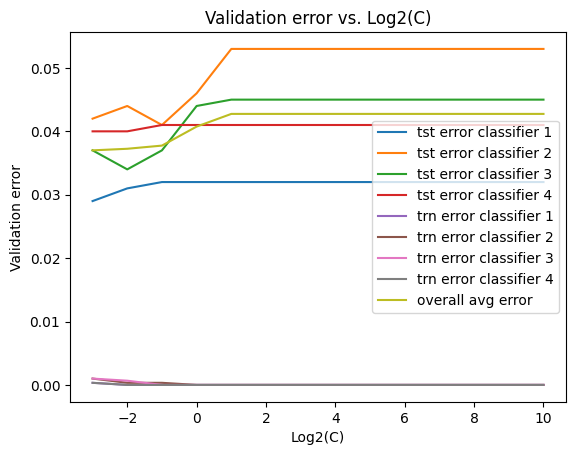

In [ ]:
import matplotlib.pyplot as plt

fig, errplots = plt.subplots()
errplots.plot(pwr, err1, label='tst error classifier 1')      # Test error from the first binary classifier
errplots.plot(pwr, err2, label='tst error classifier 2')      # Test error from the second binary classifier
errplots.plot(pwr, err3, label='tst error classifier 3')      # Test error from the third binary classifier
errplots.plot(pwr, err4, label='tst error classifier 4')      # Test error from the fourth binary classifier
errplots.plot(pwr, trainerr1, label='trn error classifier 1') # Training error from the first binary classifier
errplots.plot(pwr, trainerr2, label='trn error classifier 2') # Training error from the second binary classifier
errplots.plot(pwr, trainerr3, label='trn error classifier 3') # Training error from the third binary classifier
errplots.plot(pwr, trainerr4, label='trn error classifier 4') # Training error from the fourth binary classifier
errplots.plot(pwr, cumerr, label='overall avg error')         # Average of all 4 classifiers
errplots.set_ylabel('Validation error')
errplots.set_xlabel('Log2(C)')
errplots.legend()
errplots.set_title('Validation error vs. Log2(C)')
plt.show()


#d.Comparing accuracies of binary classifier 2 (probably mean 1) vs others

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125
SVM_SM_D1 = train_SVM(X_train_data, y_train_data, true_class=1.0, C=0.125)

# Predicting labels for the test set
y_test_pred = SVM_SM_D1.predict(X_test_data)

# Calculating accuracy score and confusion matrix
ytest_new = new_label_y(y_test_data, true_class=1.0)
accuracy = accuracy_score(ytest_new, y_test_pred)
confusion_mat = confusion_matrix(ytest_new, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.9616666666666667
Confusion Matrix:
[[1789   11]
 [  81  519]]
Predicted Labels: [ 1  1  1 ... -1 -1 -1]


#Comparing accuracies of binary classifier 2 vs others

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125
SVM_SM_D1 = train_SVM(X_train_data, y_train_data, true_class=2.0, C=0.125)

# Predicting labels for the test set
y_test_pred = SVM_SM_D1.predict(X_test_data)

# Calculating accuracy score and confusion matrix
ytest_new = new_label_y(y_test_data, true_class=2.0)
accuracy = accuracy_score(ytest_new, y_test_pred)
confusion_mat = confusion_matrix(ytest_new, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.94625
Confusion Matrix:
[[1760   40]
 [  89  511]]
Predicted Labels: [-1 -1 -1 ... -1 -1 -1]


#Comparing accuracies of binary classifier 3 vs others

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125
SVM_SM_D1 = train_SVM(X_train_data, y_train_data, true_class=3.0, C=0.125)

# Predicting labels for the test set
y_test_pred = SVM_SM_D1.predict(X_test_data)

# Calculating accuracy score and confusion matrix
ytest_new = new_label_y(y_test_data, true_class=3.0)
accuracy = accuracy_score(ytest_new, y_test_pred)
confusion_mat = confusion_matrix(ytest_new, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.9654166666666667
Confusion Matrix:
[[1782   18]
 [  65  535]]
Predicted Labels: [-1 -1 -1 ... -1 -1 -1]


#Comparing accuracies of binary classifier 4 vs others

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125
SVM_SM_D1 = train_SVM(X_train_data, y_train_data, true_class=4.0, C=0.125)

# Predicting labels for the test set
y_test_pred = SVM_SM_D1.predict(X_test_data)

# Calculating accuracy score and confusion matrix
ytest_new = new_label_y(y_test_data, true_class=4.0)
accuracy = accuracy_score(ytest_new, y_test_pred)
confusion_mat = confusion_matrix(ytest_new, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.9416666666666667
Confusion Matrix:
[[1749   51]
 [  89  511]]
Predicted Labels: [-1 -1 -1 ...  1  1  1]


#e.

In [ ]:
from sklearn.preprocessing import normalize

# Normalizing feature vectors
X_train_norm = normalize(X_train_data, norm='l2', axis=1, copy=True, return_norm=False)
X_test_norm = normalize(X_test_data, norm='l2', axis=1, copy=True, return_norm=False)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125 with normalized feature vectors
SVM_norm1 = train_SVM(X_train_norm, y_train_data, true_class=1.0, C=0.125)

# Predicting labels for the test set with normalized feature vectors
y_test_pred = SVM_norm1.predict(X_test_norm)

# Calculating accuracy score and confusion matrix
ytest_new = new_label_y(y_test_data, true_class=1.0)
accuracy = accuracy_score(ytest_new, y_test_pred)
confusion_mat = confusion_matrix(ytest_new, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.9216666666666666
Confusion Matrix:
[[1795    5]
 [ 183  417]]
Predicted Labels: [ 1 -1 -1 ... -1 -1 -1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125 with normalized feature vectors
SVM_norm1 = train_SVM(X_train_norm, y_train_data, true_class=2.0, C=0.125)

# Predicting labels for the test set with normalized feature vectors
y_test_pred = SVM_norm1.predict(X_test_norm)

# Calculating accuracy score and confusion matrix
ytest_new = new_label_y(y_test_data, true_class=2.0)
accuracy = accuracy_score(ytest_new, y_test_pred)
confusion_mat = confusion_matrix(ytest_new, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.8166666666666667
Confusion Matrix:
[[1800    0]
 [ 440  160]]
Predicted Labels: [-1 -1 -1 ... -1 -1 -1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125 with normalized feature vectors
SVM_norm1 = train_SVM(X_train_norm, y_train_data, true_class=3.0, C=0.125)

# Predicting labels for the test set with normalized feature vectors
y_test_pred = SVM_norm1.predict(X_test_norm)

# Calculating accuracy score and confusion matrix
ytest_new = new_label_y(y_test_data, true_class=3.0)
accuracy = accuracy_score(ytest_new, y_test_pred)
confusion_mat = confusion_matrix(ytest_new, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.8991666666666667
Confusion Matrix:
[[1795    5]
 [ 237  363]]
Predicted Labels: [-1 -1 -1 ... -1 -1 -1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125 with normalized feature vectors
SVM_norm1 = train_SVM(X_train_norm, y_train_data, true_class=4.0, C=0.125)

# Predicting labels for the test set with normalized feature vectors
y_test_pred = SVM_norm1.predict(X_test_norm)

# Calculating accuracy score and confusion matrix
ytest_new = new_label_y(y_test_data, true_class=4.0)
accuracy = accuracy_score(ytest_new, y_test_pred)
confusion_mat = confusion_matrix(ytest_new, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.8845833333333334
Confusion Matrix:
[[1788   12]
 [ 265  335]]
Predicted Labels: [-1 -1 -1 ...  1  1 -1]


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Training a multiclass classifier using One-vs-Rest strategy with normalized feature vectors
ovr1 = OneVsRestClassifier(LinearSVC(random_state=0, C=0.125))
modelovr1 = ovr1.fit(X_train_norm, y_train_data)

# Predicting labels for the test set
y_test_pred = modelovr1.predict(X_test_norm)

# Calculating accuracy score and confusion matrix
accuracy = accuracy_score(y_test_data, y_test_pred)
confusion_mat = confusion_matrix(y_test_data, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.9116666666666666
Confusion Matrix:
[[546  12  11  31]
 [ 26 517  13  44]
 [ 14   7 565  14]
 [  8  17  15 560]]
Predicted Labels: [1. 1. 1. ... 4. 4. 4.]


#f.

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Training a multiclass classifier using One-vs-One strategy with normalized feature vectors
ovo1 = OneVsOneClassifier(LinearSVC(random_state=0, C=0.125))
modelovo1 = ovo1.fit(X_train_norm, y_train_data)

# Predicting labels for the test set
y_test_pred = modelovo1.predict(X_test_norm)

# Calculating accuracy score and confusion matrix
accuracy = accuracy_score(y_test_data, y_test_pred)
confusion_mat = confusion_matrix(y_test_data, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Predicted Labels:", y_test_pred)


Accuracy: 0.8875
Confusion Matrix:
[[530  20  13  37]
 [ 18 519  15  48]
 [ 21  15 539  25]
 [ 11  26  21 542]]
Predicted Labels: [1. 1. 1. ... 4. 4. 4.]
